In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
header_list = ["age","workcalss","fnlwgt","education","education_num","marital-status","occupation",
               "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country",
               "income"] #15 columns (14 features, 1 target).
dataset_people = pd.read_csv("C:/Users/ksmin/data_Science/dataset/Adult Data.csv", names=header_list)

print(dataset_people.info())
print()
print(dataset_people.isna().sum()) #non-null data.
print()
print(dataset_people.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workcalss       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

age               0
workcalss         0
fnlwgt            0
education         0
educati

In [6]:
dataset_cancer = pd.read_csv("C:/Users/ksmin/data_Science/dataset/lung_cancer_examples.csv")
nRow, nCol = dataset_cancer.shape
print(dataset_cancer.head())
print()
print(dataset_cancer.info())
print(f'There are {nRow} rows and {nCol} columns')

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB
None
There are 59 rows and 7 columns


<Axes: xlabel='Age', ylabel='Result'>

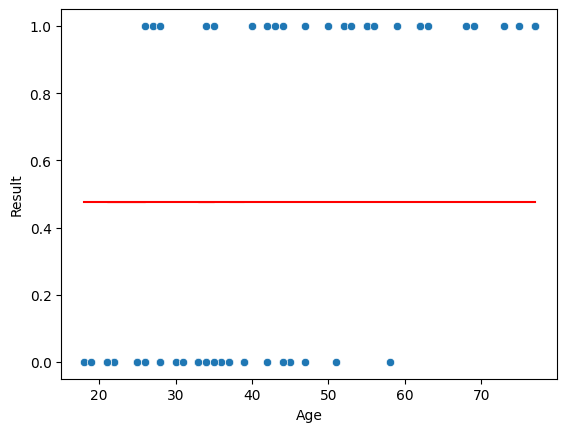

In [18]:
sns.scatterplot(data = dataset_cancer, x = dataset_cancer['Age'], y = dataset_cancer['Result'])
predicted = dataset_cancer['Result'].mean()
sns.lineplot(x=dataset_cancer['Age'],y = predicted,color = 'red')

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset_cancer[['Age','Smokes','Alkhol']])
scaled_data = pd.DataFrame(scaled_data, columns=['Age', 'Smokes', 'Alkhol'])
print(round(pd.DataFrame(scaled_data),2))

     Age  Smokes  Alkhol
0  -0.47   -1.52    0.32
1  -0.97    0.62    0.75
2  -0.78   -1.90   -0.52
3  -0.91   -1.90   -0.95
4   1.58   -1.40    1.17
5  -0.54   -1.90   -1.37
6   0.96   -0.01   -1.37
7  -1.28   -0.39   -0.52
8   0.15   -1.65   -1.37
9   0.58    0.37    0.75
10 -0.60   -1.40   -1.37
11 -1.53   -0.64   -0.10
12 -1.10   -1.65   -0.95
13 -0.91    0.62    2.02
14 -0.54    1.25    2.02
15 -0.23    0.37   -0.95
16 -0.04    0.88    0.75
17 -1.47   -0.39   -1.37
18  1.20   -1.27   -0.10
19  1.89   -0.64    1.17
20  0.77   -0.01   -0.10
21 -0.60   -0.89   -0.95
22 -1.28    0.62   -0.52
23  0.09   -1.27   -0.95
24  2.14   -1.52    1.17
25 -1.34    0.62   -0.10
26 -0.35   -0.01   -0.52
27 -0.54   -0.39   -1.37
28  0.77    0.62    0.32
29 -0.16    0.62    1.59
30 -0.41   -0.26   -0.52
31  0.83    0.62   -0.10
32  0.27   -0.01    2.02
33  1.20    1.25    0.32
34 -1.03   -0.64   -0.52
35 -1.10    0.62   -0.52
36  1.02    0.62    0.32
37  1.20   -0.01    0.75
38 -0.60    1.25   -0.52


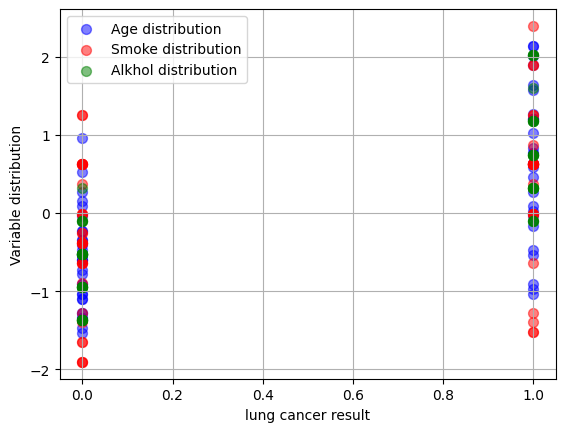

In [25]:
plt.scatter(dataset_cancer['Result'], scaled_data['Age'], c = 'blue',s = 50,alpha=0.5, label= 'Age distribution')
plt.scatter(dataset_cancer['Result'], scaled_data['Smokes'], c = 'red',s = 50,alpha=0.5, label= 'Smoke distribution')
plt.scatter(dataset_cancer['Result'], scaled_data['Alkhol'], c = 'green',s = 50,alpha=0.5, label= 'Alkhol distribution')
plt.plot(predicted, c = 'red')
plt.xlabel("lung cancer result")
plt.ylabel("Variable distribution")
plt.grid()
plt.legend()
plt.show()
#의미가 없다. -> 정규화된 데이터를 보는 중.

In [45]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
X = scaled_data[['Age','Smokes','Alkhol']] #scale을 하든 안하든 중요도 결과값은 같다.
y = dataset_cancer[['Result']]

dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_) 
plt.dt_clf_model.feature_importrances_
#결론 교차 검증을 5번을 하였을 때 decision tree model의 예측값은 정확도가 평균적으로 93%해당
#Age, Smokes, Alkhol 데이터를 StandardScale을 통해 하였고 각 feature의 중요도는 19%, 0%, 76%해당
#알코올의 원인이 가장 큰 것으로 판단.

Cross-validation scores: [0.83333333 1.         1.         0.91666667 0.90909091]
Average accuracy: 0.9318181818181819
[0.19126419 0.0453149  0.76342091]


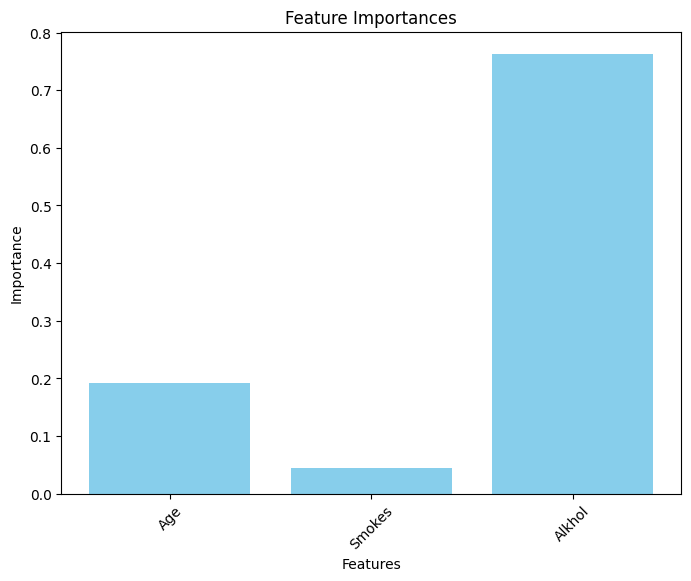

In [46]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [42]:
#dt_clf_model_text = tree.export_text(dt_clf_model)
#print(dt_clf_model_text)

|--- feature_2 <= -0.31
|   |--- class: 0
|--- feature_2 >  -0.31
|   |--- feature_0 <= -1.19
|   |   |--- class: 0
|   |--- feature_0 >  -1.19
|   |   |--- feature_0 <= -0.26
|   |   |   |--- feature_2 <= 0.53
|   |   |   |   |--- feature_1 <= -1.08
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -1.08
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.53
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  -0.26
|   |   |   |--- class: 1

